# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
data = pd.read_csv('Data/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Visualization

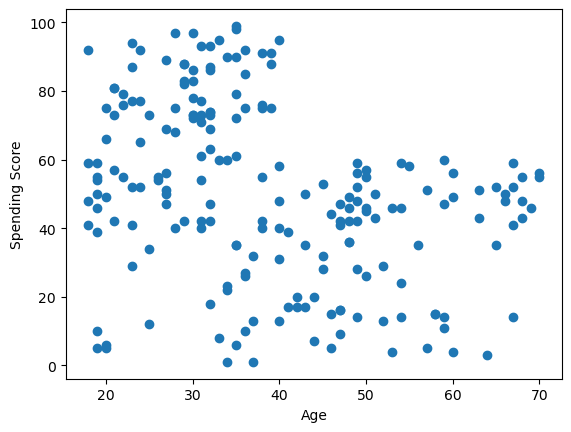

In [5]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

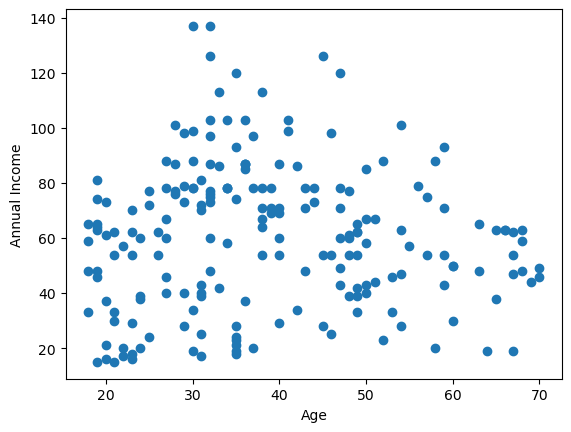

In [6]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

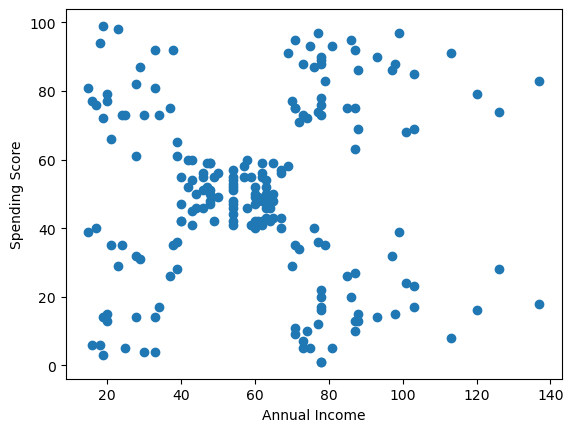

In [7]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Creation of Model

#### Elbow Method

In [8]:
list = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    list.append(km.inertia_)


In [9]:
list

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37271.8862365895,
 30273.39431207004,
 25022.485004530357,
 21818.11458845218]

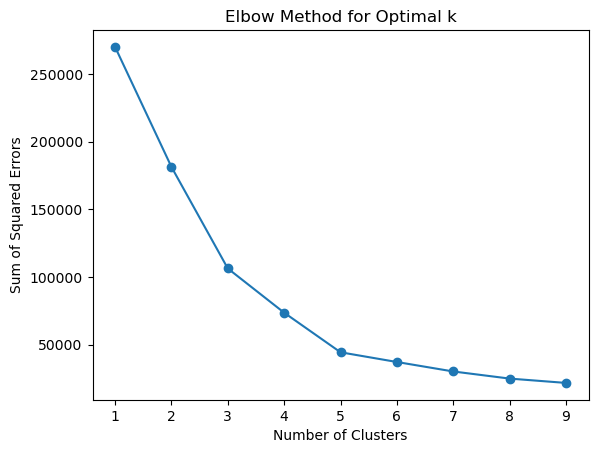

In [10]:
plt.plot(range(1, 10), list, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()


# Predicition

In [11]:
km = KMeans(n_clusters= 5)
predicted = km.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
predicted

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [12]:
data['Cluster'] = predicted
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


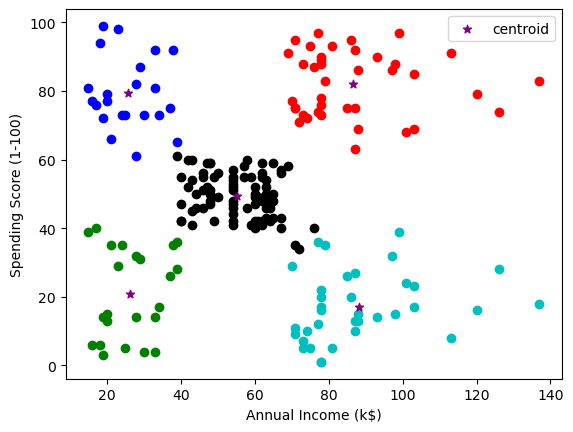

In [13]:
# Separate data into different DataFrames based on cluster assignments
data1 = data[data.Cluster == 0]
data2 = data[data.Cluster == 1]
data3 = data[data.Cluster == 2]
data4 = data[data.Cluster == 3]
data5 = data[data.Cluster == 4]

# Scatter plot for each cluster
plt.scatter(data1['Annual Income (k$)'], data1['Spending Score (1-100)'], color='green')
plt.scatter(data2['Annual Income (k$)'], data2['Spending Score (1-100)'], color='red')
plt.scatter(data3['Annual Income (k$)'], data3['Spending Score (1-100)'], color='black')
plt.scatter(data4['Annual Income (k$)'], data4['Spending Score (1-100)'], color='c')
plt.scatter(data5['Annual Income (k$)'], data5['Spending Score (1-100)'], color='blue')

# Scatter plot for cluster centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

# Axes labels
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Legend
plt.legend()

# Display the plot
plt.show()

Determining the target customers and developing a marketing strategy based on a clustering model like KMeans involves understanding the characteristics of each cluster. In your specific case, the clusters are formed based on 'Annual Income (k$)' and 'Spending Score (1-100)'. Here are some general considerations for each cluster:

Cluster 0 (Green):<br>
    High annual income and high spending score.<br>
    Potential high-value customers who are already spending well.<br>
    Target with premium or luxury products/services.<br>
    
Cluster 1 (Red):<br>
    Moderate to high annual income but lower spending score.<br>
    Potential for increased spending with targeted marketing.<br>
    Focus on understanding their needs and preferences to encourage higher spending.
    
Cluster 2 (Black):<br>
    Moderate annual income and moderate spending score.<br>
    Middle-income customers with moderate spending habits.<br>
    Offer promotions or value deals to maintain loyalty.<br>
    
Cluster 3 (Cyan):<br>
    Low to moderate annual income but high spending score.<br>
    Potential for increased spending with targeted marketing.<br>
    Focus on products or services that align with their interests<br>
    
Cluster 4 (Blue):<br>
    Low annual income and low spending score.<br>
    Budget-conscious customers with limited spending capacity.<br>
    Offer cost-effective products or discounts.